## Домашнее задание №3 (курс "Практикум по программированию на языке Python")

### Тема: Основы анализа данных и машинного обучения в Python.

#### Преподаватель: Мурат Апишев (mel-lain@yandex.ru)

**Выдана**:   14 апреля 2021

**Дедлайн**:   21:00 28 апреля 2021

**Среда выполнения**: Jupyter Notebook (Python 3.7)

#### Правила:

Результат выполнения задания - Jupyter Notebook с кодом и подробными ответами в случае теоретических вопросов. __Максимальное число баллов за задание - 20__.

Все ячейки должны быть "выполненными", при этом результат должен воспроизводиться при проверке (на Python 3.7). Если какой-то код не был запущен или отрабатывает с ошибками, то пункт не засчитывается. Задание, сданное после дедлайна, _не принимается_. Можно отправить недоделанное задание, выполненные пункты будут оценены.

Готовое задание отправляется на почту преподавателя.

Задание выполняется самостоятельно. Если какие-то студенты будут уличены в списывании, все они автоматически получат за эту работу 0 баллов. Если вы нашли в Интернете какой-то специфичный код, который собираетесь заимствовать, обязательно укажите это в задании - наверняка вы не единственный, кто найдёт и использует эту информацию.

Удалять фрагменты формулировок заданий запрещается.

#### Постановка задачи:

- В данной работе нужно решить ряд задач c использованием библиотек для обработки данных и машинного обучения, а также дать ичерпывающие ответы на поставленные вопросы.
- В задачах 1-3 запрещается использовать циклы, генераторы списков и списковые включения, а также функции высшего порядка, необходимо написать тесты, проверяющие работу решения в обычных и крайних случаях.
- Даже если это не указано явно в требованиях, код должен быть по возможности неизбыточным, работать с разумной сложностью и объёмом потребялемой памяти, проверяющие могут снизить балл за задание, выполненное без учёта этого требования.
- Результирующий код должен быть читаемым, с единой системой отступов и адеквантными названиями переменных, проверяющие могут снизить балл за задание, выполненное без учёта этого требования.
- Везде, где это требуется, должны быть отрисованы необходимые графики и даны комментарии и выводы.

__Задание 1 (0.5 балла):__ Проверить, что все элементы входного массива строго положительны.

In [1]:
import re
import numpy as np
import unittest

import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
def task_1(arr):
    return np.all(np.array(arr) > 0, axis=0)

In [3]:
print(task_1([1, 2, 3, 4])) # True
print(task_1([1]))          # True
print(task_1([0, 1]))       # False
print(task_1([-1]))         # False
print(task_1([-1, 0, 1]))   # False

True
True
False
False
False


__Задание 2 (0.5 балла):__ В векторе повторить все значения `n` раз. Пример: для массива `[1, 2, 3]` и `n` равного 3 ответом должен быть массив `[1, 1, 1, 2, 2, 2, 3, 3, 3]`.

In [4]:
def task_2(arr, n):
    return np.repeat(np.array(arr), repeats=n, axis=0)

In [5]:
print(task_2([1, 2, 3], 3))   # [1, 1, 1, 2, 2, 2, 3, 3, 3]
print(task_2([1], 5))         # [1, 1, 1, 1, 1]
print(task_2([-1, 0, 1], 2))  # [-1, -1, 0, 0, 1, 1]
print(task_2([-1, 1], 0))     # []

[1 1 1 2 2 2 3 3 3]
[1 1 1 1 1]
[-1 -1  0  0  1  1]
[]


__Задание 3 (1 балл):__ Для векторов `V` и `v` построить вектор, в котором на 0-й позиции будет находиться сумма первых `v[0]` элементов вектора `V`, на 1-й - следующих `v[1]` элементов, и т.д. Гарантируется, что элементов в `V` достаточное количество. Пример: для массивов `V=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]` и `v=[2, 1, 3]` ответом будет `[3, 3, 15]`.

In [6]:
def task_3(V, v):
    result = []
    idx = 0
    for item in v:
        result.append(np.cumsum(V[idx:idx+item], axis=0)[item-1])
        idx += item
    return result

In [7]:
print(task_3([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [2, 1, 3])) # [3, 3, 15]
print(task_3([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [2, 2, 3])) # [3, 7, 18]
print(task_3([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 1, 1])) # [1, 2, 3]
print(task_3([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [3, 3, 3])) # [6, 15, 24]

[3, 3, 15]
[3, 7, 18]
[1, 2, 3]
[6, 15, 24]


Для решения следующих заданий скачайте набор данных 20 News Group с помощью следующего кода:

In [8]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

X_train = fetch_20newsgroups(subset='train')
X_test = fetch_20newsgroups(subset='test')

label_names = pd.DataFrame(columns=['label_name', 'label_id'],
                           data=[(i, e) for i, e in enumerate(list(X_train.target_names))])
data = pd.DataFrame()
data['text'] = X_train.data + X_test.data
data['is_train'] = [True] * len(X_train.data) + [False] * len(X_test.data)
data['label_id'] = list(X_train.target) + list(X_test.target)

__Задание 4 (1.5 балла):__ Используя возможности библиотеки pandas

- сделайте join таблиц `data` и `label_names`, удалив из итоговой таблицы поле `label_id`
- посчитайте количество обучающих и тестовых данных
- постройте круговую диаграмму, показывающую долю каждого класса в обучающих данных

In [9]:
result = data.merge(label_names, left_on='label_id', right_on='label_name')
result.drop(['label_id_x', 'label_name'], axis=1, inplace=True)

In [10]:
print("Train data length:", len(result[result['is_train'] == True]))
print("Test data length:", len(result[result['is_train'] == False]))

Train data length: 11314
Test data length: 7532


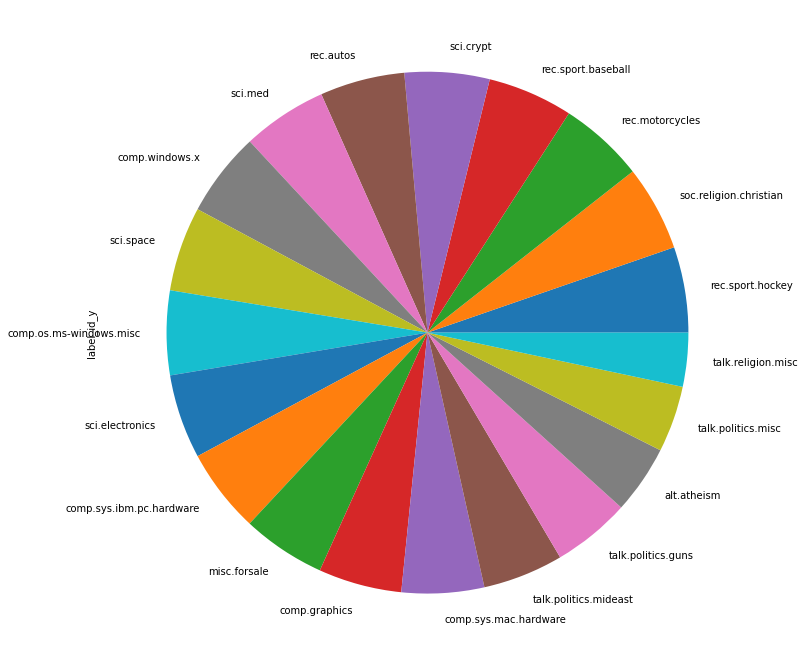

In [11]:
plt.rcParams["figure.figsize"] = (12, 12)
result[result['is_train'] == True]['label_id_y'].value_counts().plot.pie();

__Задание 5 (1.5 балла):__ Каждый объект представляет собой текст. Чаще всего тексты предобрабатывают перед тем, как пытаться выделять из них признаки. Опишите функцию `preprocess`, которая получает на вход сырой текст и возвращает предобработанный. Примените эту функцию к элементу `text` каждого объекта и результат запишите в столбец `pp_text` (далее под текстом подразумевается именно содержимое этого столбца). За пределами `preprocess` циклами пользоваться запрещено (т.е. предобработка должна применяться средствами DataFrame). Функция должна выполнять следующий набор операций:

- привести текст к нижнему регистру
- заменить все символы '\n', '\t' и '\r' на пробелы
- заменить в тексте все символы, не являющиеся английскими буквами, на пробелы
- сделать split текста по пробелам, удалив все пустые слова
- вернуть получившийся список слов

Для ускорения `preprocess` может использовать внешние переменные, например, скомпилированные регулярные выражения.

In [12]:
comp_regex = re.compile(r'[^a-z ]')

def preprocess(text):    
    text = text.lower()
    text = re.sub(comp_regex, ' ', text)
    text = text.split()
    return text

def task_5():
    result['pp_text'] = result['text'].apply(preprocess)

In [13]:
task_5()

In [65]:
result

,text,is_train,label_id_y,pp_text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,True,rec.autos,"[from, lerxst, wam, umd, edu, where, s, my, th..."
1,From: CPKJP@vm.cc.latech.edu (Kevin Parker)\nS...,True,rec.autos,"[from, cpkjp, vm, cc, latech, edu, kevin, park..."
2,From: jimf@centerline.com (Jim Frost)\nSubject...,True,rec.autos,"[from, jimf, centerline, com, jim, frost, subj..."
3,From: eliot@lanmola.engr.washington.edu (eliot...,True,rec.autos,"[from, eliot, lanmola, engr, washington, edu, ..."
4,From: sjp@hpuerca.atl.hp.com (Steve Phillips)\...,True,rec.autos,"[from, sjp, hpuerca, atl, hp, com, steve, phil..."
...,...,...,...,...
18841,From: rja14@cl.cam.ac.uk (Ross Anderson)\nSubj...,False,sci.crypt,"[from, rja, cl, cam, ac, uk, ross, anderson, s..."
18842,From: wcs@anchor.ho.att.com (Bill Stewart +1-9...,False,sci.crypt,"[from, wcs, anchor, ho, att, com, bill, stewar..."
18843,From: dougb@comm.mot.com (Doug Bank)\nSubject:...,False,sci.crypt,"[from, dougb, comm, mot, com, doug, bank, subj..."
18844,From: ed@titipu.resun.com (Edward Reid)\nSubje...,False,sci.crypt,"[from, ed, titipu, resun, com, edward, reid, s..."


__Задание 6 (2 балла):__ Каждое уникальное слово текста представляет собой признак. Посчитайте, сколько в обучающих текстах есть уникальных слов, отобразите гистограмму частот встречаемости слов в обучающей коллекции, 
отсортировав слова по убыванию частоты встречаемости (по оси X идут все слова из словаря коллекции в порядке убывания частоты встречаемости, по оси Y указываются значения частот).

Для уменьшения признакового пространства словарь фильтруют. Удалите из словаря

- все слова, встречающиеся более 9000-х раз
- все слова, встречающиеся менее 3-х раз
- все слова длиной менее 3 символов
- все слова длиной более 20 символов
- все слова, состоящие из одного и того же символа

Профильтруйте обучающую коллекцию по новому словарю и снова посчитайте число уникальных слов в словаре и снова постройте гистограмму частот.

In [14]:
from collections import Counter

vocabulary = Counter()

def plot_counter(cnt):
    labels, values = zip(*cnt)
    indexes = np.arange(len(labels))
    plt.title('BarPlot for 15 most common words count')
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.bar(indexes, values)
    plt.xticks(indexes, labels)
    plt.show()

def check_word(word):
    for ch in word:
        if word[0] == ch:
            continue
        else:
            return True
    return False

def task_6():
    for item in result['pp_text']:
        vocabulary.update(item)
    proc_voc = Counter({k:v for k,v in vocabulary.items() if v <= 9000 and v >= 3 and len(k) >= 3 and len(k) <= 20 and check_word(k)})
    plot_counter(vocabulary.most_common(15))
    plot_counter(proc_voc.most_common(15))
    return proc_voc

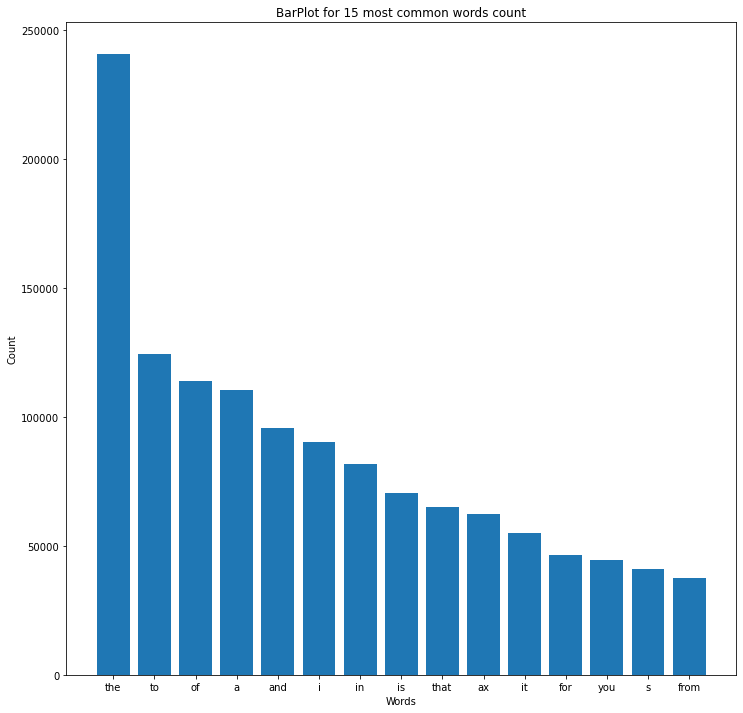

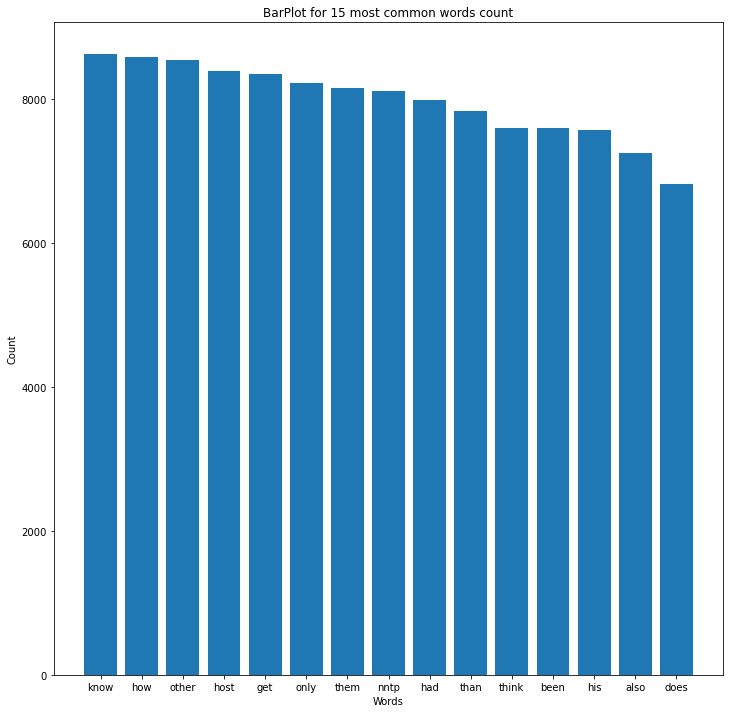

In [15]:
words_cnt = task_6()

__Задание 7 (2 балла):__ Для построения моделей данные нужно перевести в числовой вид. Для этого воспользуйтесь представлением "мешка слов", в котором признаками являются слова, а значениями - частоты их встречаемости в документе. Построить представление мешка слов можно с помощью класса CountVectorizer из sklearn. Подготовьте векторизатор, подав ему обучающие текстовые данные из `data` (приведите тексты к формату входа векторизатора) и полученный выше словарь.

Примените полученный векторизатор к обучающим и тестовым данным, на выходе должны получиться два numpy array (первая размерность - число объектов, вторая - число слов в словаре).

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

def task_7():
    vocabulary = list(words_cnt.keys())
    vectorizer = CountVectorizer(vocabulary=vocabulary)
    vectorizer.fit(data['text'])
    train_data = vectorizer.transform(data[data['is_train'] == True]['text'])
    test_data = vectorizer.transform(data[data['is_train'] == False]['text'])
    assert len(vectorizer.vocabulary_) == len(vocabulary)
    return train_data, test_data

In [17]:
train_data, test_data = task_7()

In [18]:
train_data.shape, test_data.shape

((11314, 51551), (7532, 51551))

__Задание 8 (2 балла):__ Модель логистической регрессии хорошо работает для простых задач классификации текстов, примените её к полученным данным. Для этого настройте модель на обучающих данных, сделайте предсказание для тестовых и измерьте качество с помощью метрик accuracy и F1-score с микро- и макро-усреднением. Попробуйте подобрать оптимальное значение коэффициента регуляризации С с помощью GridSearchCV.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

train_target = data[data['is_train'] == True]['label_id']
test_target = data[data['is_train'] == False]['label_id']

def task_8():
    log_reg = LogisticRegression()
    log_reg.fit(train_data, train_target)
    preds = log_reg.predict(test_data)
    print("Logistic Regression:")
    print(f"Accuracy:\t{accuracy_score(preds, test_target)}")
    print(f"F1-score micro:\t{f1_score(preds, test_target, average='micro')}")
    print(f"F1-score macro:\t{f1_score(preds, test_target, average='macro')}")
    print()
    print("Logistic Regression after GridSearchCV:")
    log_reg_cv = LogisticRegression()
    grid = {
        'C': [0.01, 0.1, 1, 10, 100]
    }
    grid_search = GridSearchCV(estimator = log_reg_cv,
                               param_grid = grid,
                               scoring = 'accuracy',
                               cv = 3)
    grid_search.fit(train_data, train_target)
    gs_preds = grid_search.predict(test_data)
    print(f"Best params: {grid_search.best_params_}")
    print(f"Accuracy:\t{accuracy_score(gs_preds, test_target)}")

In [20]:
task_8()

Logistic Regression:
Accuracy:	0.7947424322889007
F1-score micro:	0.7947424322889007
F1-score macro:	0.7884536068286894

Logistic Regression after GridSearchCV:
Best params: {'C': 0.1}
Accuracy:	0.7985926712692512


__Задание 9 (1.5 балл):__ Ошибки классификации удобно анализировать с помощью матрицы ошибок. Сделав предсказание на тесте постройте и визуализируйте эту матрицу с помощью функции plot_confusion_matrix в двух вариантах: с абсолютными и относительными (нормированными) значеними. Определите классы, которые чаще всего путаются между собой.

In [21]:
from sklearn.metrics import plot_confusion_matrix

def task_9():
    log_reg = LogisticRegression(max_iter=1000, C=0.1)
    log_reg.fit(train_data, train_target)
    plot_confusion_matrix(log_reg, test_data, test_target)
    plt.title('Not Normalized')
    plt.show()
    plot_confusion_matrix(log_reg, test_data, test_target, normalize='true', values_format='.2f')
    plt.title('Normalized')
    plt.show()

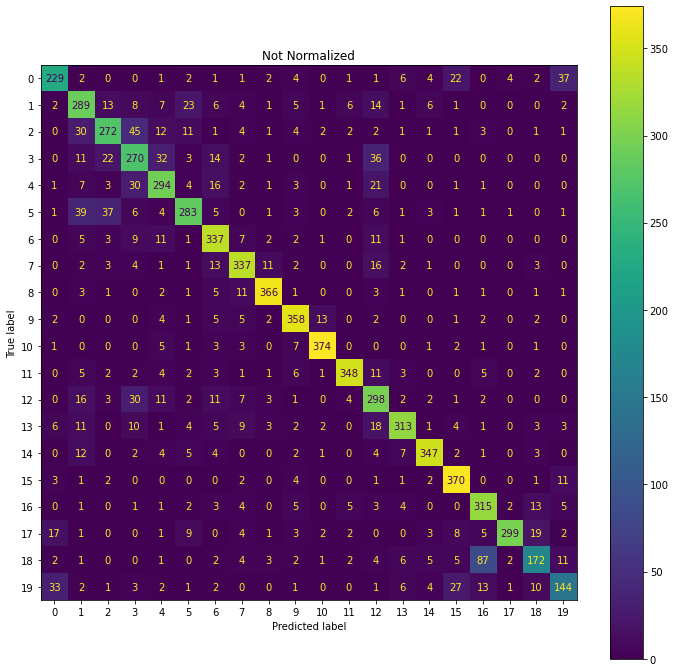

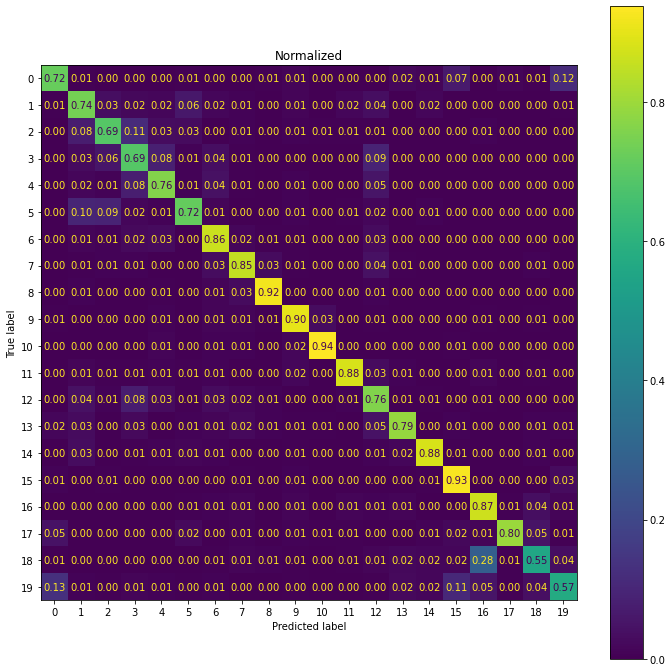

In [22]:
task_9()

__Задание 10 (2.5 балла):__ Установите библиотеку XGBoost и обучите модель градиентного бустинга для решения поставленной задачи классификации. Попробуйте подобрать оптимальную модель, выбрав 2-3 важных параметра обучения. Укажите, какие параметры в большей, а какие - в меньшей степени оказали влияние на итоговое качество модели.

In [23]:
# https://www.mikulskibartosz.name/xgboost-hyperparameter-tuning-in-python-using-grid-search/
from xgboost import XGBClassifier


def task_10():
    xgb = XGBClassifier(eval_metric='mlogloss', nthread=4, seed=42)
    xgb.fit(train_data, train_target)
    preds = xgb.predict(test_data)
    print("XGBClassifier:")
    print(f"Accuracy:\t{accuracy_score(preds, test_target)}")
    print(f"F1-score micro:\t{f1_score(preds, test_target, average='micro')}")
    print(f"F1-score macro:\t{f1_score(preds, test_target, average='macro')}")
    print()
    print("XGBClassifier tuned:")
    
    xgb_cv = XGBClassifier(eval_metric='mlogloss', nthread=4, seed=42)
    grid = {
        'max_depth': range(4,7),
        'n_estimators': range(99, 102),
        'learning_rate': [0.1, 0.01, 0.05, 1]
    }
    grid_search = GridSearchCV(estimator = xgb_cv,
                               param_grid = grid,
                               scoring = 'accuracy',
                               cv = 3)
    grid_search.fit(train_data, train_target)
    gs_preds = grid_search.predict(test_data)
    print(f"Best params: {grid_search.best_params_}")
    print(f"Accuracy:\t{accuracy_score(gs_preds, test_target)}")

In [24]:
task_10()

XGBClassifier:
Accuracy:	0.7788104089219331
F1-score micro:	0.7788104089219331
F1-score macro:	0.7730720556518925

XGBClassifier tuned:
Best params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 99}
Accuracy:	0.7663303239511418


In [28]:
xgb = XGBClassifier(eval_metric='mlogloss', n_estimators=500, eta=0.05)
xgb.fit(train_data, train_target)
preds = xgb.predict(test_data)
print("XGBClassifier:")
print(f"Accuracy:\t{accuracy_score(preds, test_target)}")

XGBClassifier:
Accuracy:	0.7793414763674986


In [51]:
# Испробовал несколько вариантов, поиск гиперпараметров по сетке занимает на моем ноутубуке очень много времени,
# поэтому попробовал в ручную подобрать параметры после предыдущих блоков 
# Я много раз перезапускал с разными параметрами, не все попытки сохранились. 
# Но исходя из проделанного могу преполодить, что наибольшее влияние оказывают n_estimators и max_depth
xgb = XGBClassifier(eval_metric='mlogloss', n_estimators=1000, eta=0.05)
xgb.fit(train_data, train_target)
preds = xgb.predict(test_data)
print("XGBClassifier:")
print(f"Accuracy:\t{accuracy_score(preds, test_target)}")

XGBClassifier:
Accuracy:	0.7830589484864577


__Задание 11 (2.5 балла):__ Часто в обработке текстов возникает задача выделения тем, обсуждаемых в них. Одним из способов решения это задачи является кластеризация графа совстречаемостей слов. Для текстов, находящихся в поле `pp_text` постройте словарь "слово" в "слово" в "счетчик совстречаемости", для слова A и B достаточно хранить A -> B -> counter, хранить B -> A -> counter не нужно. Счетчик увеличивается на 1, если пара слов встретилась в одном тексте внутри окна с длиной 10 слов.

In [61]:
def task_11():
    window_size = 10
    dictionary = {}
    for item in result['pp_text']:
        for i in range(len(item) - window_size + 1):
            window = item[i: i + window_size]
            for j in range(1, 10):
                if (window[0], window[j]) in dictionary and window[0] != window[j]:
                    dictionary[(window[0], window[j])] += 1
                else:
                    dictionary[(window[0], window[j])] = 1
    return dictionary

In [62]:
dictionary = task_11()

In [63]:
# A -> B с максимальным Value 
max(dictionary, key=dictionary.get)

('the', 'of')

In [64]:
# Размер получившегося словаря
len(dictionary)

10328511

In [67]:
len(vocabulary)

115065

__Задание 12 (2.5 балла):__ Приняв каждое слово за вершину, а ребра между ними - за наличие совместной встречаемости, постройте граф совстречаемостей. Все ребра равнозначны, ребро добавляется между словами, если значение счетчика совместной встречамости этих слов выше заданного порога T. Примените к получившему графу алгоритм выделения сообществ greedy_modularity_communities из библиотеки NetworkX и напечайте получившиеся вообщества. Можно ли их как-то интерпретировать?

Пробуйте варьировать значение T от 70 до 120 и удалять слишком большие (и потому заведомо бесполезные) сообщества и сообщества из 1 слова.

In [93]:
from networkx import Graph
from networkx.algorithms import community

def task_12(T):
    G = Graph()
    G.add_nodes_from(words_cnt.keys()) # Взял отфильтрованный словарь из 6 задания в качестве
    for item in dictionary:
        if item[0] in G.nodes and item[1] in G.nodes:
            if dictionary[item] > T:
                G.add_edge(item[0], item[1], weight=dictionary[item])
    result = community.greedy_modularity_communities(G)
    return [x for x in result if len(x) > 1 and len(x) < 100] # Ограничение свехру 100

In [95]:
for i in range(70, 130, 10):
    g = task_12(i)
    print(f"T = {i}\n", g[0])

T = 70
 frozenset({'bios', 'isu', 'sources', 'represents', 'mac', 'misc', 'forwarded', 'hard', 'controller', 'silicon', 'ide', 'crypt', 'rom', 'shuttle', 'sender', 'forsale', 'station', 'original', 'scsi', 'card', 'sci', 'comp', 'disk', 'ethernet', 'added', 'sys', 'floppy', 'config', 'poster', 'tape', 'drive', 'sin', 'space', 'digest', 'med', 'flight', 'graphics', 'video', 'meg', 'drives'})
T = 80
 frozenset({'using', 'bit', 'jpeg', 'program', 'stream', 'color', 'forwarded', 'key', 'char', 'quite', 'ide', 'image', 'pgp', 'rom', 'sender', 'shuttle', 'system', 'original', 'scsi', 'open', 'card', 'comp', 'disk', 'archive', 'clipper', 'ethernet', 'window', 'added', 'full', 'sys', 'images', 'windows', 'tape', 'chip', 'drive', 'little', 'sin', 'algorithm', 'challenge', 'med', 'graphics', 'crypt', 'gun', 'meg', 'run', 'isu', 'swap', 'files', 'output', 'build', 'mac', 'misc', 'hard', 'processing', 'controller', 'law', 'zip', 'silicon', 'format', 'forsale', 'eof', 'escrow', 'oname', 'vendor', '